In [1]:
import pymesh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
landmarks = pd.read_csv("../data_artificial_cites/landmarks_reales/model_mesh_001.pts",header=None,index_col=[0],skiprows=range(2),delimiter=r"\s+")
output_mesh = pymesh.load_mesh("out/torsos/model_mesh_001.ply")

In [3]:
ls0 = landmarks.iloc[0].tolist()
ls1 = landmarks.iloc[4].tolist()
ls2 = landmarks.iloc[9].tolist()
ls3 = landmarks.iloc[10].tolist()
head = landmarks.iloc[14].tolist()
foot_left = landmarks.iloc[8].tolist()
foot_right = landmarks.iloc[5].tolist()
landmarks_torzo = np.array([ls0,ls1,ls2,ls3])
centroide = landmarks_torzo.mean(0)
center_foot = np.array([foot_left,foot_right]).mean(0)
center_foot_rodilla = np.array([landmarks.iloc[7].tolist(),landmarks.iloc[6].tolist()]).mean(0)

In [4]:
def distance3D(a, b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)

def distance2D(a, b):
    return math.sqrt( ((b[0]-a[0])**2)  + ((b[1]-a[1])**2) )

def angle(a,b):
    uv = a[0]*b[0] + a[1]*b[1]+ a[2]*b[2]
    norma_uv = math.sqrt((a[0]**2+a[1]**2+a[2]**2)) * math.sqrt((b[0]**2+b[1]**2+b[2]**2 ))
    return math.acos(uv/norma_uv)

In [5]:
semi_landmark = landmarks_torzo[1:3].mean(0)
distancias = []
for v in output_mesh.vertices:
    distancias.append(distance3D(semi_landmark,v))
distancias = np.array(distancias)
ver_semi_landmark = output_mesh.vertices[distancias.argmin()]
distancias.argmin()

25518

In [6]:
xdot = (head[0]*center_foot[0] + head[1]*center_foot[1] + head[2]*center_foot[2])
norma = math.sqrt(head[0]**2+head[1]**2+head[2]**2) * math.sqrt(center_foot[0]**2+center_foot[1]**2+center_foot[2]**2)
angle_head = (math.cos(xdot/norma) ** -1)
angle_head_r = math.radians(90 - math.degrees(angle_head))
angle_head_r

-0.2704475286051009

In [7]:
new_mesh = pymesh.meshutils.generate_icosphere(0.01,ver_semi_landmark)
q = pymesh.misc.Quaternion(quat=[1,-angle_head_r, 0, 0])
circle_points = []
for i in range(100):
    distance_points = 0.3
    angleY = (i)
    angleZ = 0
    x= ver_semi_landmark[0] + distance_points * math.cos (angleZ) * math.sin(angleY)
    y= ver_semi_landmark[1] + distance_points * math.sin (angleZ)
    z= ver_semi_landmark[2] + distance_points * math.cos (angleZ) * math.cos(angleY)
    v_v = [x,y,z] 
    v = q.rotate(v_v)
    v[2] = v[2] /6.5
    v[1] = v[1] /6.5
    v[0] = v[0] /5.5
    circle_points.append(v)
  
    temp = pymesh.meshutils.generate_icosphere(0.01,v)
    new_mesh = pymesh.boolean(new_mesh, temp , operation="union",engine="auto")
pymesh.save_mesh("out/circle.ply", new_mesh)

In [8]:
circle_points = np.array(circle_points)
circle_points.shape

(100, 3)

In [9]:
vertexs = []
cp = circle_points[0]
for cp in circle_points:
    distancias_circle = []
    for v in output_mesh.vertices:
        distancias_circle.append(distance3D(cp,v))
    vertexs.append(output_mesh.vertices[np.array(distancias_circle).argmin()])

In [10]:
new_mesh = pymesh.meshutils.generate_icosphere(0.01,vertexs[0])
for v in vertexs[1:]:
    temp = pymesh.meshutils.generate_icosphere(0.01,v)
    new_mesh = pymesh.boolean(new_mesh, temp , operation="union",engine="auto")
pymesh.save_mesh("out/cinta.ply", new_mesh)

In [11]:
a = np.array(vertexs)

In [12]:
a.shape

(100, 3)

In [13]:
a1 = np.unique(a)

In [14]:
a1 = np.unique(a)
new_array = [tuple(row) for row in a]
uniques = np.unique(new_array)

In [15]:
aux = 0
for i,v in enumerate(uniques[:-1]):
    aux = aux + np.min(map(lambda x: distance3D(x,v),uniques[i+1:]))
aux

1.3483984519304606

In [16]:
uniques.shape

(80, 3)

In [17]:
a1 = np.unique(np.delete(vertexs, [1], axis=1))
new_array = [tuple(row) for row in a]
uniques = np.unique(new_array)
aux = 0
for i,v in enumerate(uniques[:-1]):
    aux = aux + np.min(map(lambda x: distance2D(x,v),uniques[i+1:]))
aux

0.91274279550245863

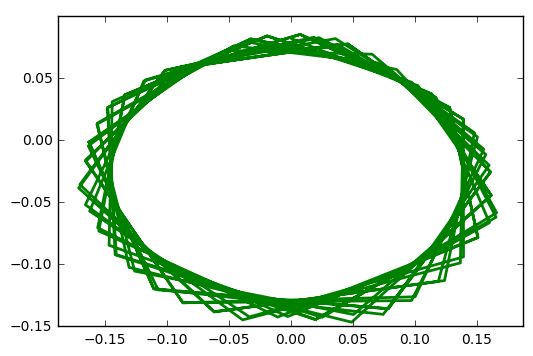

In [18]:
import matplotlib.pyplot as plt
plt.plot(np.array(vertexs)[:,0], np.array(vertexs)[:,2], 'g-',lw=2)
#plt.axis([0, 6, 0, 20])
plt.axis('equal')
plt.show()

In [19]:
import scipy

In [20]:
scipy.__version__

'0.18.1'

In [21]:
#apt-get install gfortran -y
#pip install -U scipy

In [22]:
vertexs_2d = np.delete(vertexs, [1], axis=1)

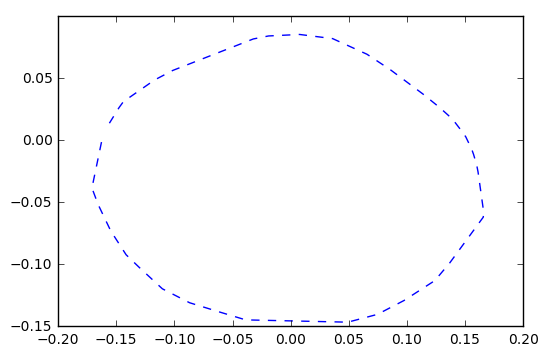

In [23]:
from scipy.spatial import ConvexHull
#import matplotlib.pyplot as plt
#points = np.random.rand(30, 2)   # 30 random points in 2-D
l = np.array(vertexs_2d)
hull = ConvexHull(l,incremental=False)
#plt.plot(points[:,0], points[:,1], 'o')
# for simplex in hull.simplices:
#     #print(simplex)
#     plt.plot(l[simplex, 0], l[simplex, 1], 'k-')

#hull.add_points(l)
#hull.close()

plt.plot(l[hull.vertices,0], l[hull.vertices,1], '--')
#plt.plot(l[:,0], l[:,1], 'b.', lw=2)
plt.show()

In [24]:
from scipy.spatial import distance

In [25]:
distance.pdist(np.array([head,center_foot_rodilla]))

array([ 1.60664674])

In [26]:
distance3D(head,center_foot_rodilla)

1.606646738832031

In [28]:
aux = 0
for i,v in enumerate(vertexs_2d[hull.vertices][:-1]):
    aux = aux + distance2D(v,vertexs_2d[hull.vertices][i+1])
aux = aux + distance2D(vertexs_2d[hull.vertices][0],vertexs_2d[hull.vertices][-1])
aux

0.8915739734766357

In [ ]:
new_mesh = pymesh.meshutils.generate_icosphere(0.01,center_foot_rodilla)
pymesh.save_mesh("out/centro_pies.ply", new_mesh)